<a href="https://colab.research.google.com/github/Fridalizett/IA_concentracion/blob/main/A01275226_Reconocimiento_de_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



A01275226
Frida Lizett Zavala Pérez

# Reconocimiento de digitos


Este ejemplo de red neuronal para clasificación, es una adaptación de un ejemplo mostrado en el siguiente libro.
[Chollet, F. (2017). Deep learning with python. Manning Publications.](https://www.manning.com/books/deep-learning-with-python)



In [55]:
from keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np


import matplotlib.pyplot as plt

## Recuperar los dígitos de la librería mnist

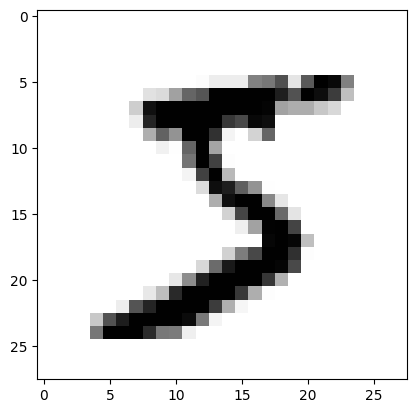

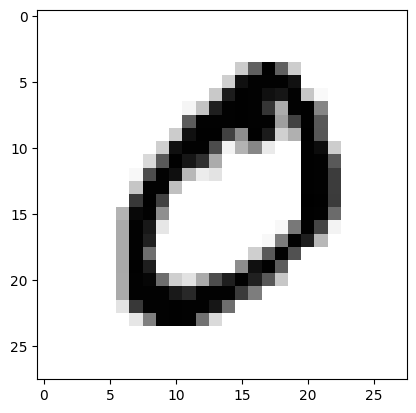

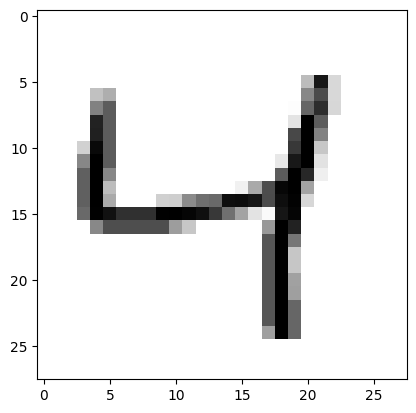

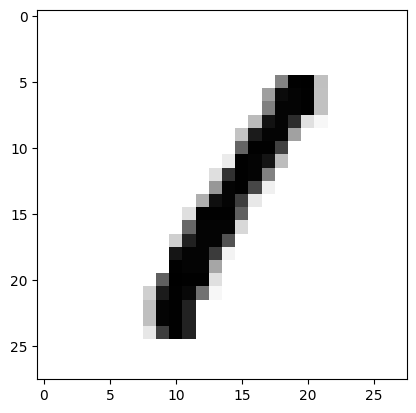

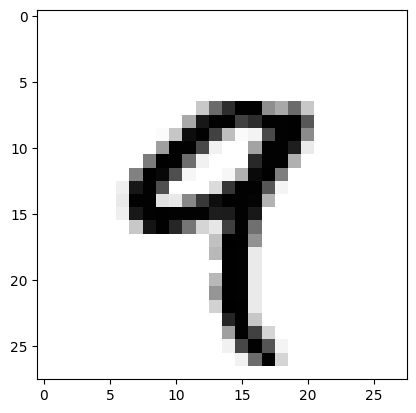

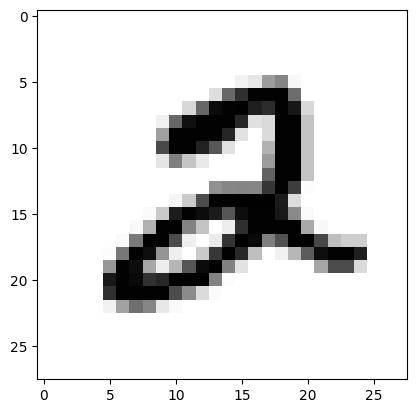

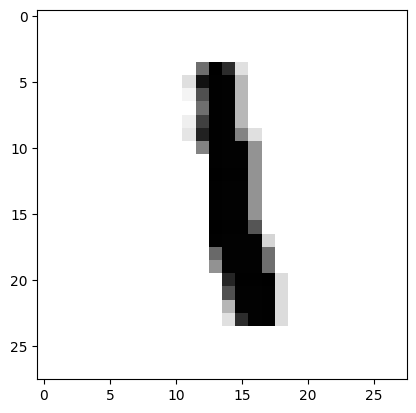

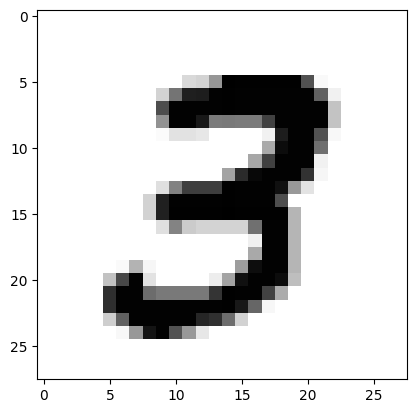

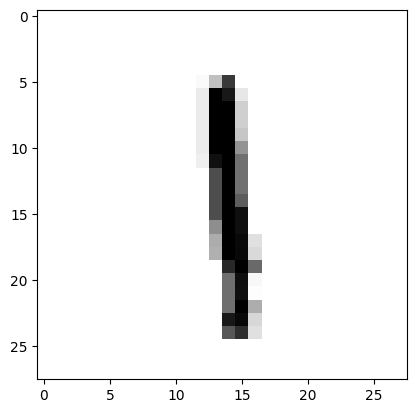

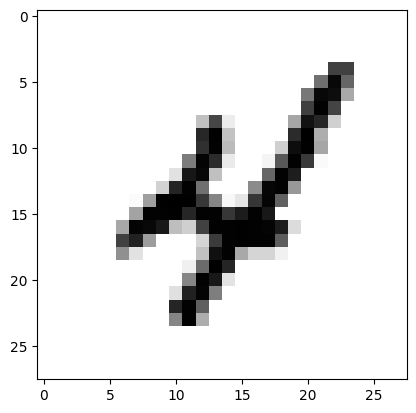

In [56]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(10):
    digit = train_images[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

In [57]:
from keras.src.utils import image_dataset
from keras.src.utils.data_utils import validate_file
print("Test images (tamaño):")
print(len(test_images))
print("Train images (tamaño):")
print(len(train_images))




Test images (tamaño):
10000
Train images (tamaño):
60000


## Creación del modelo

In [58]:
#secuencial
'''model = models.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])'''

#API
input_tensor = layers.Input(shape=(784))
x1 = layers.Dense(512, activation ='relu')(input_tensor)
x2 = layers.Dense(256, activation ='relu')(x1)
output_tensor = layers.Dense(10, activation ='softmax')(x2)

model = models.Model(inputs = input_tensor, outputs = output_tensor)




## Definir las funciones para
- Optimización
- Pérdida (Loss function)
- Metrica de éxito de la red neuronal

In [59]:
model.compile(optimizer='rmsprop',                    #Root Mean Square Propogation algorithm
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Cambiar la forma de los datos de 28x28 a vecores de 784 y normalizar sus valores de [0,255] a [0, 1]

In [60]:
print("Train images (shape):")
print (train_images.shape)

Train images (shape):
(60000, 28, 28)


In [61]:
copy_test_images = test_images  #Make a copy so that we can use it later to display the original digits
train_images = train_images.reshape((len(train_images), 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((len(test_images), 28 * 28))
test_images = test_images.astype('float32') / 255

In [62]:
print("Train images (shape después de cambiar y normalizar los datos):")
print (train_images.shape)

Train images (shape después de cambiar y normalizar los datos):
(60000, 784)


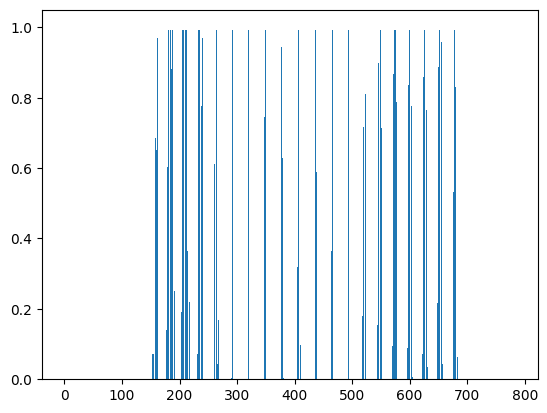

In [63]:
x = range(0, 784)
digit = train_images[0]
plt.bar(x, digit)
plt.show()

## Realizar el aprendizaje con
- 128 lotes
- 5 Épocas

In [64]:
print("number of batches",len(train_images)/128)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

number of batches 468.75
Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2359 - accuracy: 0.9285
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0864 - accuracy: 0.9731
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0549 - accuracy: 0.9830
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0385 - accuracy: 0.9878
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0288 - accuracy: 0.9907


## Probar el modelo

Validar el modelo generando predicciones

1/1 [==============================] - 0s 60ms/step


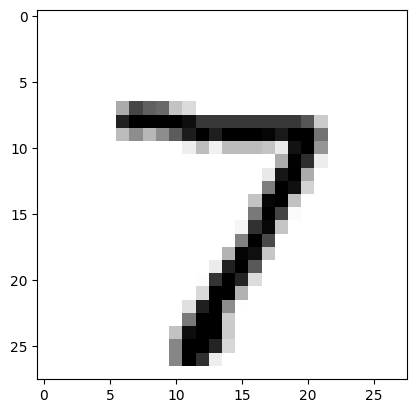

Predictions vector:  [1.73061316e-08 7.07874506e-08 1.93258029e-06 8.48529635e-06
 1.44478275e-11 5.19456087e-08 5.77322868e-12 9.99983609e-01
 1.23605346e-07 5.69125814e-06]
Most probable:  7
True value: 7
Probability:  0.9999836



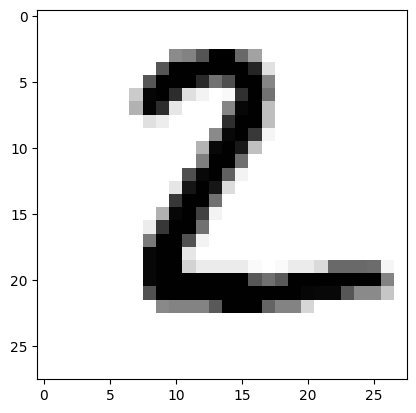

Predictions vector:  [1.4458434e-10 3.7378395e-08 9.9999982e-01 2.4002016e-08 1.1274444e-14
 7.9378004e-11 8.8161353e-12 4.3385248e-12 6.0390509e-10 1.5720651e-12]
Most probable:  2
True value: 2
Probability:  0.9999998



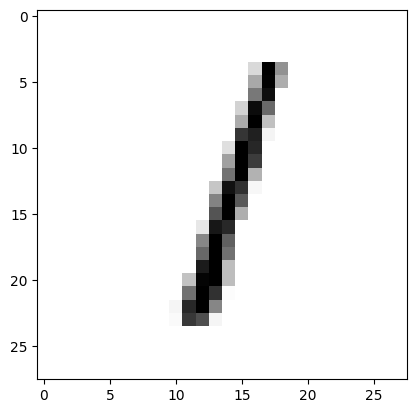

Predictions vector:  [3.9904076e-08 9.9996728e-01 1.4073933e-06 6.1152328e-08 1.7760755e-06
 4.3841028e-06 2.2844094e-06 5.6361155e-06 1.6067594e-05 9.5920518e-07]
Most probable:  1
True value: 1
Probability:  0.9999673



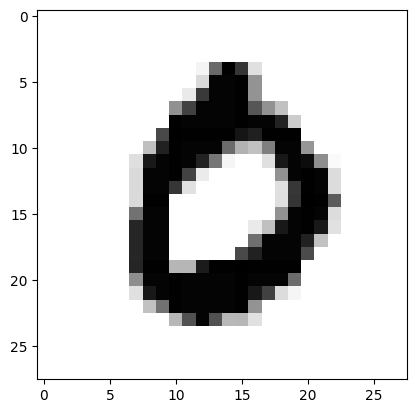

Predictions vector:  [9.99951899e-01 2.98656460e-07 1.39638532e-05 6.21788701e-08
 1.28943748e-06 1.15774334e-07 2.76185219e-05 8.02244131e-07
 2.87578370e-08 3.72815862e-06]
Most probable:  0
True value: 0
Probability:  0.9999519



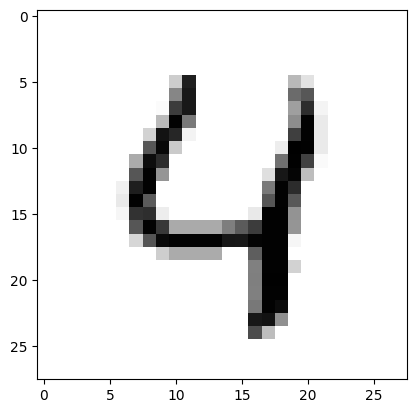

Predictions vector:  [5.0741694e-08 5.6334489e-08 1.3126824e-07 1.3301673e-09 9.9983263e-01
 1.0067064e-07 3.3496548e-07 1.0865340e-06 1.7216207e-07 1.6565550e-04]
Most probable:  4
True value: 4
Probability:  0.99983263



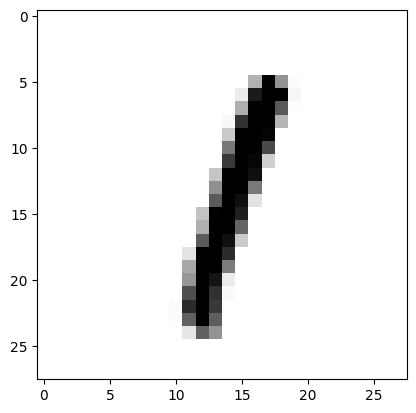

Predictions vector:  [1.15202370e-09 9.99995530e-01 6.11940454e-09 3.70183550e-09
 7.63119374e-07 4.61554279e-08 1.51109596e-08 1.60581135e-06
 1.75668413e-06 1.05220465e-07]
Most probable:  1
True value: 1
Probability:  0.9999955



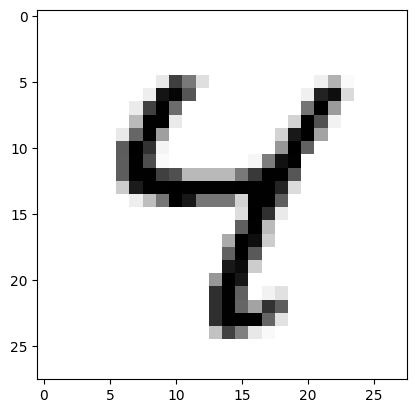

Predictions vector:  [5.9569870e-11 3.0625007e-08 3.2600986e-10 1.8901476e-09 9.9988729e-01
 1.0954510e-06 2.6785530e-08 1.5471512e-06 7.3476054e-05 3.6495556e-05]
Most probable:  4
True value: 4
Probability:  0.9998873



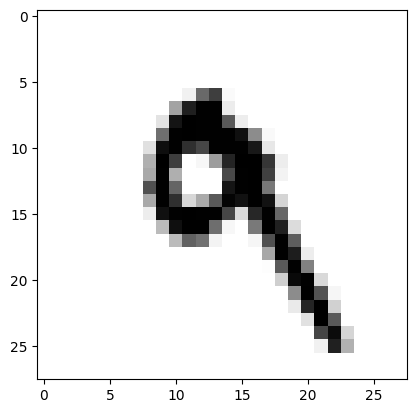

Predictions vector:  [1.5114767e-07 1.5675230e-05 1.3470516e-04 5.2704914e-03 3.2654736e-04
 2.8556777e-05 1.5168652e-08 8.1934319e-05 4.0030965e-05 9.9410182e-01]
Most probable:  9
True value: 9
Probability:  0.9941018



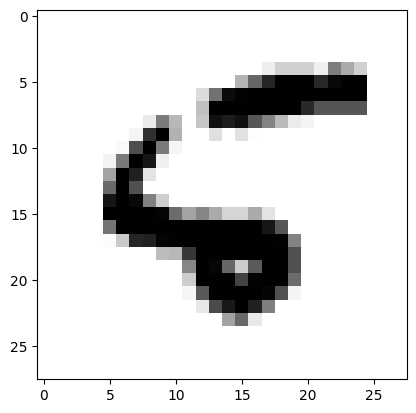

Predictions vector:  [8.5007791e-12 3.3863319e-09 4.3981178e-08 2.3130277e-10 5.4542451e-08
 9.6574056e-01 3.4216832e-02 6.3846172e-12 2.1813823e-05 2.0624351e-05]
Most probable:  5
True value: 5
Probability:  0.96574056



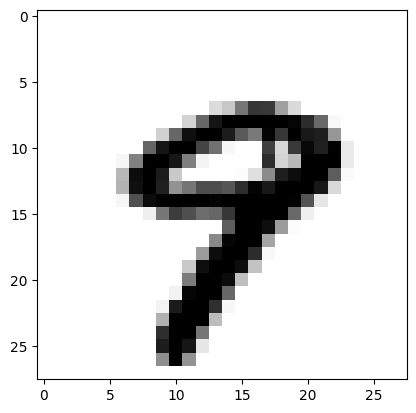

Predictions vector:  [1.08310855e-13 4.33178753e-12 4.06790227e-12 1.28280448e-07
 2.12013998e-04 8.43953518e-11 3.47896814e-13 5.95376434e-07
 2.60191632e-06 9.99784648e-01]
Most probable:  9
True value: 9
Probability:  0.99978465



In [65]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

for i in range(10):
    digit = copy_test_images[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    print("Predictions vector: ", predictions[i])
    print("Most probable: ",predictions[i].argmax())
    print("True value:" ,  test_labels[i])
    print("Probability: ", predictions[i][predictions[i].argmax()])
    print("")


## Generar predicciones con los datos de train y test

In [66]:
predictions = model.predict(test_images)

predictions = model.predict(train_images)

1875/1875 [==============================] - 7s 3ms/step


1/1 [==============================] - 0s 24ms/step
Predicciones correctas: 10
Predicciones incorrectas: 0


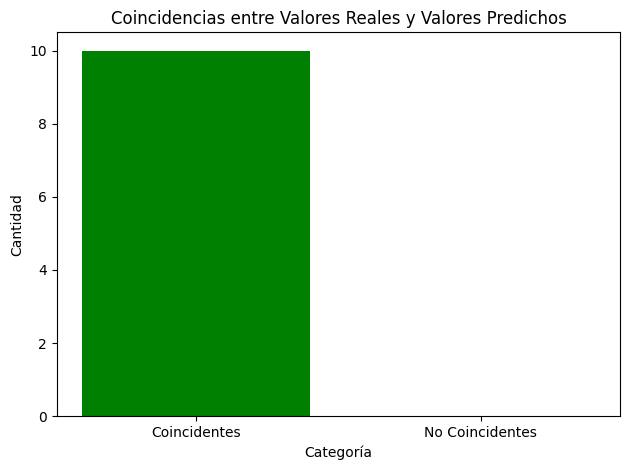

In [68]:

import matplotlib.pyplot as plt
import numpy as np

test_digits = test_images[0:10]
predictions = model.predict(test_images)

# Listas para almacenar los valores reales y predichos
real_values = []
predicted_values = []

for i in range(len(predictions)):
    # Obtener la clase predicha (índice con la probabilidad más alta)
    predicted_class = predictions[i].argmax()

    # Obtener el valor real
    real_value = test_labels[i]

    # Almacenar la clase predicha
    predicted_values.append(predicted_class)

    # Almacenar el valor real
    real_values.append(real_value)

# Contar las coincidencias entre valores reales y predichos
matching_count = sum(1 for real, predicted in zip(real_values, predicted_values) if real == predicted)
print("Predicciones correctas:", matching_count)
print("Predicciones incorrectas:",len(predictions) - matching_count)
# Crear una lista con las etiquetas para el gráfico
labels = ['Coincidentes', 'No Coincidentes']
# Crear una lista con las cantidades correspondientes
counts = [matching_count, len(predictions) - matching_count]

# Crear una figura
fig, ax = plt.subplots()

# Etiquetas de los ejes
ax.set_xlabel('Categoría')
ax.set_ylabel('Cantidad')
ax.set_title('Coincidencias entre Valores Reales y Valores Predichos')

# Crear un gráfico de barras
ax.bar(labels, counts, color=['g', 'r'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Calcular varianza de las predicciones

Media de las predicciones: 0.10000000149011612
Varianza de las predicciones: 0.08920897543430328


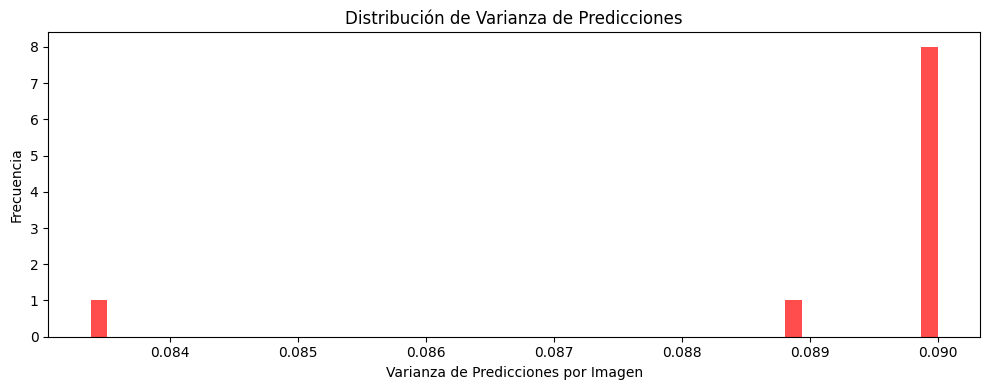

In [69]:
#print(predictions)

# Calcula la media de las predicciones
mean = np.mean(predictions)

# Calcula la varianza de las predicciones
variance = np.var(predictions)

print(f"Media de las predicciones: {mean}")
print(f"Varianza de las predicciones: {variance}")

# Graficar la media y la varianza
plt.figure(figsize=(10, 4))



# Gráfico de la varianza
plt.hist(predictions.var(axis=1), bins=50, color='red', alpha=0.7)
plt.xlabel('Varianza de Predicciones por Imagen')
plt.ylabel('Frecuencia')
plt.title('Distribución de Varianza de Predicciones')

plt.tight_layout()
plt.show()

## Probar el modelo con todos los datos de test





In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9805
test_acc: 0.9804999828338623


## Probar el modelo con todos los datos de train

In [71]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('traint_acc:', train_acc)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0179 - accuracy: 0.9942
traint_acc: 0.9942166805267334
